# Huffman Coding

- **Created by Andrés Segura Tinoco**  
- **Created on June 20, 2019**

In computer science and information theory, a **Huffman Code** is a particular type of optimal prefix code that is commonly used for lossless data compression. The output from Huffman's algorithm can be viewed as a variable-length code table for encoding a source symbol (such as a character in a file). The algorithm derives this table from the estimated probability or frequency of occurrence (weight) for each possible value of the source symbol. <a href='#link_one'>[1]</a>

In [1]:
# Load Python libraries
import numpy as np
import timeit
import pandas as pd
from collections import Counter

In [2]:
# Load Plot libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1. Huffman Code from Scratch

In [3]:
# Class HuffmanCode from scratch
class HuffmanCode:
    
    # Return a Huffman code for an ensemble with distribution p
    def get_code(self, p_symbols):
        
        # Init validation
        n = len(p_symbols)
        if n == 0:
            return dict()
        elif n == 1:
            return dict(zip(p_symbols.keys(), ['1']))
        
        # Ensure probabilities sum to 1
        self._normalize_weights(p_symbols)
        
        # Returns Huffman code
        return self._get_code(p_symbols);
    
    # (Private) Calculate Huffman code
    def _get_code(self, p):
        
        # Base case of only two symbols, assign 0 or 1 arbitrarily
        if len(p) == 2:
            return dict(zip(p.keys(), ['0', '1']))
        
        # Create a new distribution by merging lowest prob pair
        p_prime = p.copy()
        s1, s2 = self._get_lowest_prob_pair(p)
        p1, p2 = p_prime.pop(s1), p_prime.pop(s2)
        p_prime[s1 + s2] = p1 + p2
        
        # Recurse and construct code on new distribution
        code = self._get_code(p_prime)
        symbol = s1 + s2
        s1s2 = code.pop(symbol)
        code[s1], code[s2] = s1s2 + '0', s1s2 + '1'
        
        return code;
    
    # (Private) Return pair of symbols from distribution p with lowest probabilities
    def _get_lowest_prob_pair(self, p):
        
        # Ensure there are at least 2 symbols in the dist.
        if len(p) >= 2:
            sorted_p = sorted(p.items(), key=lambda x: x[1])
            return sorted_p[0][0], sorted_p[1][0];
        
        return (None, None);
    
    # (Private) Makes sure all weights add up to 1
    def _normalize_weights(self, p_symbols, t_weight=1.0):
        n = sum(p_symbols.values())
        
        if n != t_weight:
            for s in p_symbols:
                p_symbols[s] = p_symbols[s] / n;

**Input:**
$$ A = \{ a_1, a_2, a_3, ..., a_n \} \tag{1} $$

$$ W = \{ w_1, w_2, w_3, ..., w_n \} \tag{2} $$

$$ n = |A| $$

**Output:**
$$ C(A, W) = \{ c_1, c_2, c_3, ..., c_n \} \tag{3} $$

**Target:**
$$ L(C) = \sum_{i=1}^n{w_i . length(c_i)} \tag{4} $$

$$ L(C) < L(T)\;for\;any\;code\;T(A, W) $$

In [4]:
# Create Huffman Code instance
hc = HuffmanCode()

### Simple Examples

In [5]:
# Alphabet with 1 symbol
sample_1 = { 'a': 1.0 }
hc.get_code(sample_1)

{'a': '1'}

In [6]:
# Alphabet with 3 symbols and total probability less than 1
sample_2 = { 'a': 0.6, 'b': 0.25, 'c': 0.1 }
hc.get_code(sample_2)

{'a': '0', 'c': '10', 'b': '11'}

In [7]:
# Alphabet with 5 symbols and total probability equal than 1.0
sample_3 = { 'a': 0.10, 'b': 0.15, 'c': 0.30, 'd': 0.16, 'e': 0.29 }
hc.get_code(sample_3)

{'e': '10', 'c': '11', 'd': '00', 'a': '010', 'b': '011'}

## 2. Compress Image with Huffman Code

This example is with a PNG image.

In [8]:
# Read file in low level (Bytes)
def get_file_bytes(file_path):
    with open(file_path, 'rb') as f:
        return bytearray(f.read());
    return None;

In [9]:
# Loading target image
file_path = "../data/img/example-3.png"
image_byte_list = get_file_bytes(file_path)

In [10]:
# Calculate code frequency
def get_term_freq(term_list):
    term_freq = {}
    terms_count = dict(Counter(term_list))
    
    for key, value in terms_count.items():
        if isinstance(key, int):
            key = str(key)
        term_freq[key] = value
    
    return term_freq;

In [11]:
# Alphabet with 256 symbols
term_freq = get_term_freq(image_byte_list)
len(term_freq)

256

In [12]:
# Normalize term frequency
n = sum(term_freq.values())
for term in term_freq:
    term_freq[term] = term_freq[term] / n;
sum(term_freq.values())

0.9999999999999994

In [13]:
# Get Huffman coding
hf_code = hc.get_code(term_freq)

In [14]:
# Creates a huffman dataframe with the codes and frequency of each of them
def create_huffman_df(code_list, term_freq):
    codes = pd.DataFrame([code_list, term_freq]).T
    codes.reset_index(level=0, inplace=True)
    codes.columns = ["byte", "code", "frequency"]
    codes['symbol'] = [chr(int(b)) for b in codes["byte"]]
    codes = codes[["byte", "symbol", "code", "frequency"]]
    
    return codes

In [15]:
# Create and showing data
codes = create_huffman_df(hf_code, term_freq)
codes.head(20)

,byte,symbol,code,frequency
0,0, ,01110,0.0284127
1,1,,110011,0.0197444
2,10,\n,0110101,0.00697332
3,100,d,01000010,0.00314809
4,101,e,110101111,0.0025088
5,102,f,00101111,0.00298616
6,103,g,00011000,0.0028726
7,104,h,10000101,0.00378738
8,105,i,110010111,0.00247305
9,106,j,101101001,0.00226065


In [16]:
# Save full huffman codes as CSV file
codes.to_csv('../huffman_codes/sample1.csv', index=False)

In [17]:
# Calculate message average size
msg_size_current = 8
msg_size_weighted = 0

for key, value in hf_code.items():
    msg_size_weighted += len(value) * term_freq[key]

In [18]:
# Current message average size (bits per symbol)
msg_size_current

8

In [19]:
# Weighted message average size (bits per symbol)
msg_size_weighted

7.783808280076634

### Real compression percentage

In [20]:
# Calculating compression ratio (%)
compress_rate = (msg_size_current - msg_size_weighted) / msg_size_current
print(round(compress_rate * 100, 2), '%')

2.7 %


**Main function:** compress a binary file using a huffman code

In [21]:
# Compress a binary file using a huffman code
def compress_bin_file(byte_list, code_list):
    bits_string = ''
    compress_list = []
    symbols_used = {}
    
    for symbol in byte_list:
        key = str(symbol)
        new_symbol = code_list[key]
        compress_list.append(new_symbol)
        
        # Save frequency of length of used symbols
        sym_len = len(new_symbol)
        if sym_len in symbols_used:
            symbols_used[sym_len] += 1
        else:
            symbols_used[sym_len] = 1
    
    # Create bits string
    bits_string = "".join(compress_list)
    
    # Sort dict by key
    symbols_used = sorted(symbols_used.items(), key=lambda x: x[0])
    
    # Return compressed file and used symbols
    return bits_string, dict(symbols_used)

In [22]:
# Compressing PNG image with Huffman code
compress_file, symbols_used = compress_bin_file(image_byte_list, hf_code)
print(compress_file[:508])

1110101111010001000110101000010111110010001101011000101001101010111001110011101110010000000100100111110111111111111101101110011100110101011100111001110101011100011111100010001000111001110011101111010011000000011010100111001000001110011100111000111000011000101111101111000011011111001110011101010011010100000011000010110110100101010010100100111001110011101100111111101011111110110000101110100000011101110100101111000001011010110110000001110011100001000111010100010011110101111100010010101111110011001100111010


In [23]:
# Weight of the compressed PNG image (KB)
print(round(len(compress_file) / 8 / 1024, 2), 'KB')

451.83 KB


In [24]:
# Weight of the original PNG image (KB)
print(round(len(image_byte_list) / 1024, 2), 'KB')

464.38 KB


In [25]:
# Show frequency of length of used symbols
symbols_used

{5: 13511, 6: 50643, 7: 68876, 8: 234607, 9: 107890}

## 3. Compress Text file with Huffman Code

This example is with a textbook in English.

In [26]:
# Loading target text book
file_path = "../data/text/book1-en.txt"
text_byte_list = get_file_bytes(file_path)

In [27]:
# Alphabet with 256 symbols
term_freq = get_term_freq(text_byte_list)
len(term_freq)

110

In [28]:
# Normalize term frequency
n = sum(term_freq.values())
for term in term_freq:
    term_freq[term] = term_freq[term] / n;
sum(term_freq.values())

0.9999999999999998

In [29]:
# Get Huffman coding
hf_code = hc.get_code(term_freq)

In [30]:
# Create and showing data
codes = create_huffman_df(hf_code, term_freq)
codes.head(20)

,byte,symbol,code,frequency
0,10,\n,101111,0.0174728
1,100,d,01111,0.0300135
2,101,e,1111,0.0929537
3,102,f,100100,0.0160457
4,103,g,100101,0.0162087
5,104,h,0001,0.0493223
6,105,i,0010,0.0496922
7,106,j,0000100001,0.000665819
8,107,k,0100001,0.00634397
9,108,l,10011,0.0336131


In [31]:
# Save full huffman codes as CSV file
codes.to_csv('../huffman_codes/sample2.csv', index=False)

In [32]:
# Calculate weighted message size average
msg_size_current = 8
msg_size_weighted = 0

for key, value in hf_code.items():
    msg_size_weighted += len(value) * term_freq[key]

In [33]:
# Current message size average (bits per symbol)
msg_size_current

8

In [34]:
# Weighted message size average (bits per symbol)
msg_size_weighted

4.624532355844688

### Real compression percentage

In [35]:
# Calculating compression ratio (%)
compress_rate = (msg_size_current - msg_size_weighted) / msg_size_current
print(round(compress_rate * 100, 2), '%')

42.19 %


In [36]:
# Compressing text file with Huffman code
compress_file, symbols_used = compress_bin_file(text_byte_list, hf_code)
print(compress_file[:508])

1110001010010000010011100010100100000101111000101001001011111011101011110111001010001111111001110010011110101100000100001111110110110101100111001000000000101011110101000011111111101100101110111000110001110000111011001100100001110011010010011011100001100011000001101001111001110011110001010110101000010100011111001101110111001110010100011111110111000000000011000100111111011101110000011010011110111000001111111110111100110000101101110101111111000011001111100110111000001010011100111111101110101111101110101111


In [37]:
# Weight of the compressed text file (KB)
print(round(len(compress_file) / 8 / 1024, 2), 'KB')

709.66 KB


In [38]:
# Weight of the original text file (KB)
print(round(len(text_byte_list) / 1024, 2), 'KB')

1227.64 KB


In [39]:
# Show frequency of length of used symbols
symbols_used

{3: 194944,
 4: 599860,
 5: 158394,
 6: 217634,
 7: 39957,
 8: 4181,
 9: 18481,
 10: 14113,
 11: 6396,
 12: 1453,
 13: 963,
 14: 580,
 15: 32,
 16: 56,
 18: 22,
 19: 20,
 20: 13}

## 4. Decompress file with Huffman Code

### 4.1. Simple approach
Test with all huffman codes until the file is completely decompressed. The codes are sorted ascending by their length.

In [40]:
# Decompress a binary file using a huffman code
def decompress_bin_file(byte_string, hf_code, forward=True):
    start_time = timeit.default_timer()
    byte_list = []
    fails_list = []
    codes_size = []
    inv_codes = {v: k for k, v in hf_code.items()}
    
    for code in inv_codes.keys():
        n = len(code)
        if not n in codes_size:
            codes_size.append(n)
    codes_size.sort(reverse = not forward)
    
    n_size = len(byte_string)
    ix = 0
    
    while ix < n_size:
        curr_tries = 0
        
        for size in codes_size:
            possible_code = byte_string[ix:ix + size]
            
            if possible_code in inv_codes.keys():
                byte = int(inv_codes[possible_code])
                byte_list.append(byte)
                ix = ix + size
                fails_list.append(curr_tries)
                break
            curr_tries += 1
        
    # Elapsed time
    elapsed = timeit.default_timer() - start_time
    
    # Algorithm accuracy
    total_tries = sum(fails_list)
    algo_accuracy = round(100 * len(byte_list) / total_tries, 2)
    
    # Verbose
    print(codes_size)
    print('elapsed time', elapsed, 's')
    print('tries:', total_tries, ', acurracy:', algo_accuracy, '%')
    
    return byte_list, fails_list;

In [41]:
# Decode/Decompress file using the Huffman code
forward = True
decompress_file, fails_list = decompress_bin_file(compress_file, hf_code, forward)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20]
elapsed time 2.1639734 s
tries: 2042143 , acurracy: 61.56 %


In [42]:
# Weight of the original text file (KB)
print(round(len(decompress_file) / 1024, 2), 'KB')

1227.64 KB


#### Comparing if the original file and the decompressed file are the same (equals)

In [43]:
# Compare if two files are equals for equality and element-wise
def compare_files(file_a, file_b):
    return np.array_equiv(file_a, file_b)

In [44]:
# Comparing files
compare_files(text_byte_list, decompress_file)

True

#### Show fault behavior during decompression

In [45]:
# Average failures per decompressed byte
fails_mean = np.mean(fails_list)
print(round(fails_mean, 4), 'fails/byte')

1.6245 fails/byte


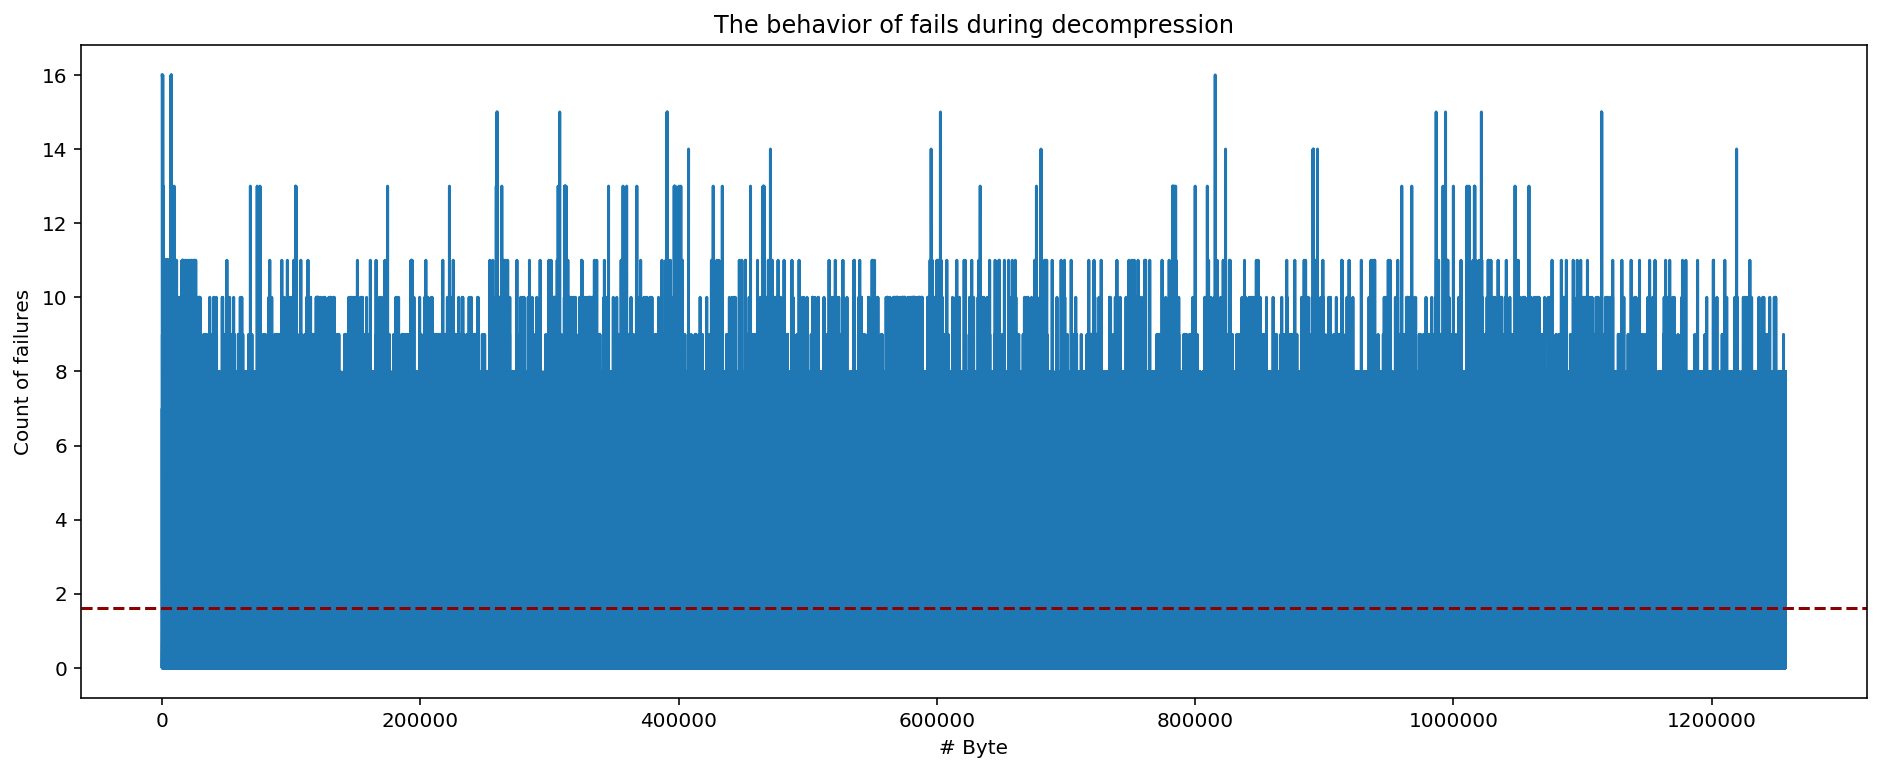

In [46]:
# Plot occurrences of stop words
fig = plt.figure(figsize = (16, 6))
plt.plot(fails_list)
plt.axhline(y = fails_mean, color = "#8b0000", linestyle = "--")
plt.title('The behavior of fails during decompression')
plt.xlabel('# Byte', fontsize = 10)
plt.ylabel('Count of failures', fontsize = 10)
plt.show()

In [47]:
# Calculate distribution
fails_dist = Counter(fails_list)
df_fails_dist = pd.DataFrame.from_records(fails_dist.most_common(), columns = ['n_fails', 'quantity'])
df_fails_dist["fails_perc"] = 100 * df_fails_dist.quantity / len(fails_list)
df_fails_dist = df_fails_dist.sort_values(by=['n_fails'])
df_fails_dist

,n_fails,quantity,fails_perc
2,0,194944,15.507450
0,1,599860,47.717801
3,2,158394,12.599962
1,3,217634,17.312399
4,4,39957,3.178509
8,5,4181,0.332591
5,6,18481,1.470131
6,7,14113,1.122664
7,8,6396,0.508790
9,9,1453,0.115584


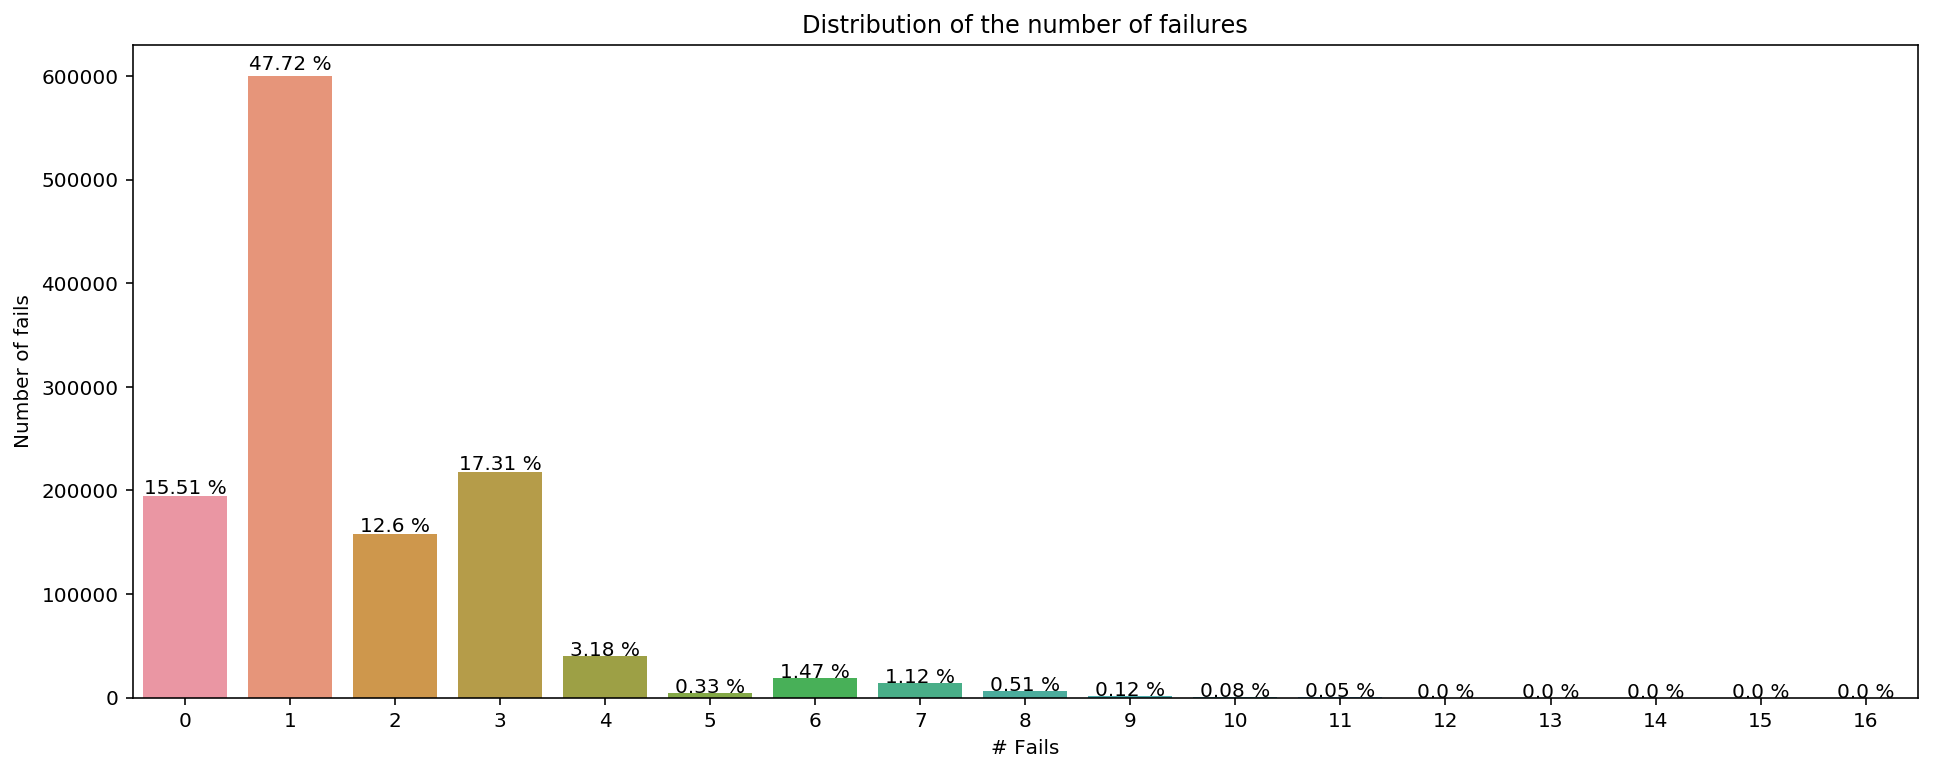

In [48]:
# Plot of the distribution of fails
fig = plt.figure(figsize = (16, 6))
g = sns.barplot(x = 'n_fails', y = 'quantity', data = df_fails_dist)
for index, row in df_fails_dist.iterrows():
    lbl_value = str(round(row.fails_perc, 2)) + ' %'
    g.text(row.n_fails, row.quantity * 1.01, lbl_value, color='black', ha="center")
plt.title('Distribution of the number of failures')
plt.xlabel('# Fails', fontsize = 10)
plt.ylabel('Number of fails', fontsize = 10)
plt.show()

### 4.2. Probabilistic approach

Test with selected pseudo-random huffman codes, based on their probability of occurrence. <a href="#link_two">[2]</a>

In [49]:
# Class Probabilistic Huffman Code from scratch
class ProbHCodes:
    
    # Constructor
    def __init__(self):
        self.prob_table = []
        self.n_rows = 0
        self.last_ix = -1
    
    # Returns the probabilistic codes table
    def get_prob_table(self):
        return self.prob_table
    
    # Function that creates the table with the the probability of use of codes in the decompression process
    def create_prob_table(self, symbols):
        self.total = sum(symbols.values())
        cum = 0

        for key, value in symbols.items():
            curr = value / self.total
            cum += curr
            item = [key, value, curr, cum]
            self.prob_table.append(item)
        
        self.n_rows = len(self.prob_table)
        self.prob_table[self.n_rows - 1][3] = 1.0
    
    # Function that returns the size and index of the selected code
    def get_prob_code(self):
        prn = np.random.uniform(0, 1)
        
        while True:
            for ix in range(self.n_rows):
                item = self.prob_table[ix]
                if prn <= item[3]:
                    if ix == self.last_ix:
                        break
                    self.last_ix = ix
                    return item[0], ix
            prn = np.random.uniform(0, 1)
    
    # Function that updates the probability of use of codes
    def update_prob_table(self, ix_code):
        
        if self.prob_table[ix_code][1] > 1:
            self.prob_table[ix_code][1] -= 1
        else:
            self.prob_table.remove(self.prob_table[ix_code])
            self.n_rows -= 1
        self.total -= 1

        cum = 0
        for row in self.prob_table:
            curr = row[1] / self.total
            cum += curr
            row[2] = curr
            row[3] = cum

In [50]:
# Decompress a binary file using a huffman code
def decompress_bin_file_prob(byte_string, hf_code, symbols_used):
    start_time = timeit.default_timer()
    
    byte_list = []
    n_size = len(byte_string)
    inv_codes = {v: k for k, v in hf_code.items()}
    
    # Create Probabilistic Huffman Codes table
    phc = ProbHCodes()
    phc.create_prob_table(symbols_used)
    
    # Get code based on probability
    size, ix_code = phc.get_prob_code()
    
    ix = 0
    tries = 0
    while ix < n_size:
        
        while True:
            tries += 1
            possible_code = byte_string[ix:ix + size]
            
            if possible_code in inv_codes.keys():
                byte = int(inv_codes[possible_code])
                byte_list.append(byte)
                ix = ix + size
                break
            
            # Get code based on probability
            size, ix_code = phc.get_prob_code()
    
    # Elapsed time
    elapsed = timeit.default_timer() - start_time
    
    # Algorithm accuracy
    algo_accuracy = round(100 * len(byte_list) / tries, 2)
    
    # Verbose
    print('elapsed time', elapsed, 's')
    print('tries:', tries, ', acurracy:', algo_accuracy, '%')
    
    return byte_list;

In [51]:
# Context
print('hf_code len:', len(hf_code), ', symbols_used:', len(symbols_used))

hf_code len: 110 , symbols_used: 17


In [52]:
# Decode/Decompress file using the Huffman code
decompress_file2 = decompress_bin_file_prob(compress_file, hf_code, symbols_used)

elapsed time 62.0306853 s
tries: 14663416 , acurracy: 8.57 %


In [53]:
# Weight of the original text file (KB)
print(round(len(decompress_file2) / 1024, 2), 'KB')

1227.64 KB


#### Comparing if the original file and the decompressed file are the same (equals)

In [54]:
# Comparing files
compare_files(text_byte_list, decompress_file2)

True

## References

<a name='link_one' href='https://en.wikipedia.org/wiki/Huffman_coding' target='_blank' >[1]</a> Wikipedia - Huffman coding.  
<a name='link_two' href='https://en.wikipedia.org/wiki/Randomized_algorithm' target='_blank' >[2]</a> Wikipedia - Randomized algorithm.  

<hr>
<p><a href="https://ansegura7.github.io/DataCompression/">« Home</a></p>